Install and import Dependencies

In [5]:
import pandas as pd
from fbprophet import Prophet

Read in Data and Process Dates

In [27]:
df = pd.read_csv('shrimp-prices.csv')

In [28]:
# Values
df.describe()

,Price,Change
count,361.000000,361.000000
mean,12.553740,0.332078
std,2.412004,3.790784
min,7.940000,-15.520000
25%,10.470000,0.000000
50%,12.130000,0.000000
75%,14.330000,1.450000
max,19.250000,18.500000


In [16]:
# Make sure that already exist a datetimeindex inside the dataframe
df.dtypes

Month      object
Price     float64
Change    float64
dtype: object

In [29]:
df.head()

,Month,Price,Change
0,1/1/1991,12.24,0.00
1,2/1/1991,12.90,5.39
2,3/1/1991,13.23,2.56
3,4/1/1991,13.23,0.00
4,5/1/1991,12.68,-3.84


In [33]:
# Create a datetimeindex into the dataframe 
df['Año'] = df['Month'].apply(lambda x: str(x)[-4:])
df['Mes'] = df['Month'].apply(lambda x: str(x)[-6:-5])
df['Dia'] = df['Month'].apply(lambda x: str(x)[:-7])
df['ds'] = pd.DatetimeIndex(df['Año'] +'-'+df['Mes']+'-'+df['Dia'])
df.head()

,Month,Price,Change,Año,Mes,Dia,ds
0,1/1/1991,12.24,0.00,1991,1,1,1991-01-01
1,2/1/1991,12.90,5.39,1991,1,2,1991-01-02
2,3/1/1991,13.23,2.56,1991,1,3,1991-01-03
3,4/1/1991,13.23,0.00,1991,1,4,1991-01-04
4,5/1/1991,12.68,-3.84,1991,1,5,1991-01-05


In [36]:
df.drop(['Month','Change','Año','Mes','Dia'],axis=1,inplace=True)
df.columns = ['y','ds']

Train Model

In [37]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

Forecast Away

In [39]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1991-01-01,12.138571,8.645284,15.519951,12.138571,12.138571,0.000823,0.000823,0.000823,-0.231926,...,0.016170,0.016170,0.016170,0.216579,0.216579,0.216579,0.0,0.0,0.0,12.139394
1,1991-01-02,12.139670,8.760224,15.919836,12.139670,12.139670,0.175297,0.175297,0.175297,-0.231926,...,0.031059,0.031059,0.031059,0.376164,0.376164,0.376164,0.0,0.0,0.0,12.314967
2,1991-01-03,12.140770,8.776819,16.290398,12.140770,12.140770,0.304989,0.304989,0.304989,-0.231926,...,0.071206,0.071206,0.071206,0.465709,0.465709,0.465709,0.0,0.0,0.0,12.445759
3,1991-01-04,12.141869,8.957993,16.037681,12.141869,12.141869,0.228883,0.228883,0.228883,-0.231926,...,-0.033111,-0.033111,-0.033111,0.493920,0.493920,0.493920,0.0,0.0,0.0,12.370751
4,1991-01-05,12.142968,8.687155,16.035742,12.142968,12.142968,0.280416,0.280416,0.280416,-0.231926,...,0.040821,0.040821,0.040821,0.471521,0.471521,0.471521,0.0,0.0,0.0,12.423384


In [40]:
forecast[['ds','yhat']]

,ds,yhat
0,1991-01-01,12.139394
1,1991-01-02,12.314967
2,1991-01-03,12.445759
3,1991-01-04,12.370751
4,1991-01-05,12.423384
...,...,...
456,2021-04-07,11.322119
457,2021-04-08,11.758767
458,2021-04-09,12.085134
459,2021-04-10,12.610364


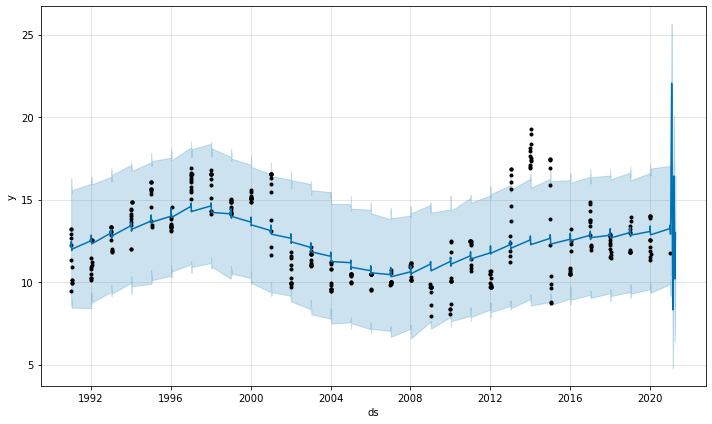

In [41]:
plotl = m.plot(forecast)

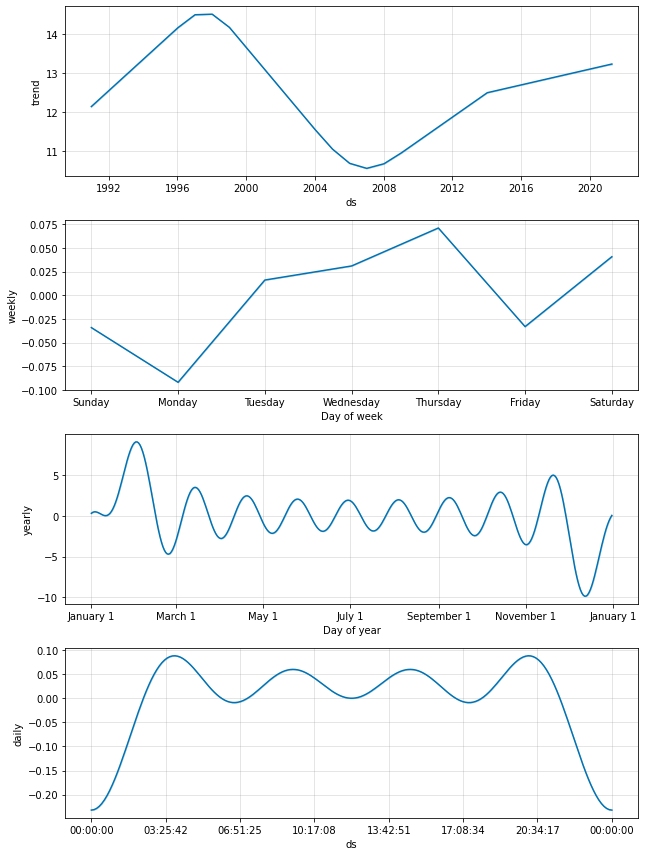

In [42]:
plot2 =  m.plot_components(forecast)